# Data_price predictions : Subset data for each symbol

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error 
import warnings; warnings.simplefilter('ignore')

In [32]:
pr25=pd.read_csv("file:///E:/D Drive/R Console_class/Algorithmic trading/EIS/pr25_headers.csv",index_col=False)
pr25.drop(pr25.columns[0],inplace=True,axis=1)
pr25.head()

,recording time,symbol,bid qty,bid price,ask qty,ask price,depth1 bid qty,depth1 bid price,depth1 ask qty,depth1 ask price,...,depth3 bid qty,depth3 bid price,depth3 ask qty,depth3 ask price,ltp,ttq,receive time stamp1,source time stamp,receive time stamp2,exchange time stamp
0,10:52:18.112881,USDINR19MAYFUT.BSE,362,70.3325,148,70.3375,100,70.3325,100,70.3375,...,500,70.3300,500,70.3400,70.3350,229391,1556169738112856,1556169738112691,1556169738112837632,1556169738112684523
1,10:52:18.207106,USDINR19APRFUT.BSE,225,70.0325,168,70.0375,100,70.0325,100,70.0375,...,500,70.0300,500,70.0425,70.0375,283333,1556169738207105,1556169738206980,1556169738207105024,1556169738206969255
2,10:52:18.792810,IUJ19,6,142.7700,7,142.7800,30,142.7600,30,142.8000,...,80,142.7500,80,142.8100,142.7800,1423,1556169738792809,1556169738768276480,1556169738792808960,1556169738767955289
3,10:52:18.981555,USDINR19MAYFUT.BSE,362,70.3325,145,70.3375,100,70.3325,100,70.3375,...,500,70.3300,500,70.3400,70.3350,229391,1556169738981554,1556169738981429,1556169738981554432,1556169738981421737
4,10:52:20.729426,USDINR19MAYFUT.BSE,150,70.3350,161,70.3375,100,70.3350,100,70.3375,...,500,70.3325,500,70.3400,70.3350,229391,1556169740729427,1556169740725049,1556169740729427456,1556169740725040960


In [33]:
null=pr25.isna().sum(axis=0)
zero_value=pr25[pr25['exchange time stamp']==0]
def zero (var1,var2):
    pr25[var1]= np.where(pr25[var1]==0,pr25[var2], pr25[var1])
    return pr25
zero('exchange time stamp', 'source time stamp')
info=pr25.describe()
info.head()

,bid qty,bid price,ask qty,ask price,depth1 bid qty,depth1 bid price,depth1 ask qty,depth1 ask price,depth2 bid qty,depth2 bid price,...,depth3 bid qty,depth3 bid price,depth3 ask qty,depth3 ask price,ltp,ttq,receive time stamp1,source time stamp,receive time stamp2,exchange time stamp
count,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,...,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06,1.440202e+06
mean,2.222843e+04,6.822317e+03,2.557709e+04,6.823395e+03,9.563516e+04,8.802826e+01,9.563516e+04,8.692417e+01,1.912695e+05,8.324286e+01,...,4.781659e+05,8.017041e+01,4.781659e+05,8.079444e+01,6.822773e+03,5.276922e+05,6.354871e+17,1.029510e+18,1.556180e+18,1.159266e+18
std,2.619303e+05,6.855733e+04,2.946008e+05,6.856818e+04,9.728386e+05,1.175728e+03,9.728386e+05,3.232518e+01,1.945677e+06,3.390159e+01,...,4.864194e+06,3.488514e+01,4.864194e+06,3.473344e+01,6.856188e+04,6.904093e+05,7.639739e+17,7.357936e+17,5.550592e+12,5.478055e+17
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.000000e+01,0.000000e+00,...,5.000000e+01,0.000000e+00,5.000000e+01,0.000000e+00,6.992500e+01,1.870000e+02,1.556170e+15,1.556170e+15,1.556170e+18,1.556170e+15
25%,2.000000e+01,7.046500e+01,2.500000e+01,7.047000e+01,1.000000e+02,7.045750e+01,1.000000e+02,7.046500e+01,2.000000e+02,7.044750e+01,...,5.000000e+02,7.038750e+01,5.000000e+02,7.040500e+01,7.046750e+01,1.652400e+04,1.556178e+15,1.556182e+15,1.556176e+18,1.240661e+18


## Dataframe of a single symbol

In [34]:

pr25=pr25[pr25['symbol']=='USDINR19JUNFUT.BSE']
pr25.head()

,recording time,symbol,bid qty,bid price,ask qty,ask price,depth1 bid qty,depth1 bid price,depth1 ask qty,depth1 ask price,...,depth3 bid qty,depth3 bid price,depth3 ask qty,depth3 ask price,ltp,ttq,receive time stamp1,source time stamp,receive time stamp2,exchange time stamp
13,10:52:20.729438,USDINR19JUNFUT.BSE,65,70.5775,115,70.585,100,70.5750,100,70.5850,...,500,70.5525,500,70.61,70.58,1823,1556169740729435,1556169740726667,1556169740729435392,1556169740726660141
14,10:52:20.729444,USDINR19JUNFUT.BSE,30,70.5775,115,70.585,100,70.5725,100,70.5850,...,500,70.5525,500,70.61,70.58,1823,1556169740729442,1556169740727716,1556169740729442304,1556169740727709545
44,10:52:21.509419,USDINR19JUNFUT.BSE,30,70.5775,65,70.585,100,70.5725,100,70.5875,...,500,70.5525,500,70.61,70.58,1823,1556169741509418,1556169741503034,1556169741509418752,1556169741503027070
45,10:52:21.509420,USDINR19JUNFUT.BSE,30,70.5775,45,70.585,100,70.5725,100,70.5875,...,500,70.5525,500,70.61,70.58,1823,1556169741509420,1556169741503060,1556169741509420288,1556169741503052843
49,10:52:21.509429,USDINR19JUNFUT.BSE,30,70.5775,10,70.585,100,70.5725,100,70.5875,...,500,70.5525,500,70.61,70.58,1823,1556169741509428,1556169741503900,1556169741509428736,1556169741503893569


In [35]:
### Indexing  column
date='2019:04:25'
pr25.insert(0,'Date',date,True)
pr25['Date']=pr25[['Date','recording time']].apply(':'.join,axis=1)
pr25['Date']=pd.to_datetime(pr25['Date'],format='%Y:%m:%d:%H:%M:%S.%f')
pr25.set_index('Date', inplace=True)

In [36]:
#### parsing recording time
pr25['recording time']=pd.to_datetime(pr25['recording time'],format='%H:%M:%S.%f')
pr25['hour']=pr25['recording time'].dt.hour
pr25['Min']=pr25['recording time'].dt.minute
pr25['Sec']=pr25['recording time'].dt.second
pr25['ms']=pr25['recording time'].dt.microsecond
pr25.shape

(234098, 28)

In [37]:
### New column without micro seconds for split indexing
pr25.insert(0,'Time Index',pr25['hour'],True)
pr25['Time Index']=pr25[['Time Index','Min']].apply(lambda x: ':'.join(x.astype(str)),axis=1)
pr25['Time Index']=pd.to_datetime(pr25['Time Index'],format='%H:%M')
pr25.head()


,Time Index,recording time,symbol,bid qty,bid price,ask qty,ask price,depth1 bid qty,depth1 bid price,depth1 ask qty,...,ltp,ttq,receive time stamp1,source time stamp,receive time stamp2,exchange time stamp,hour,Min,Sec,ms
Date,,,,,,,,,,,,,,,,,,,,,
2019-04-25 10:52:20.729438,1900-01-01 10:52:00,1900-01-01 10:52:20.729438,USDINR19JUNFUT.BSE,65,70.5775,115,70.585,100,70.5750,100,...,70.58,1823,1556169740729435,1556169740726667,1556169740729435392,1556169740726660141,10,52,20,729438
2019-04-25 10:52:20.729444,1900-01-01 10:52:00,1900-01-01 10:52:20.729444,USDINR19JUNFUT.BSE,30,70.5775,115,70.585,100,70.5725,100,...,70.58,1823,1556169740729442,1556169740727716,1556169740729442304,1556169740727709545,10,52,20,729444
2019-04-25 10:52:21.509419,1900-01-01 10:52:00,1900-01-01 10:52:21.509419,USDINR19JUNFUT.BSE,30,70.5775,65,70.585,100,70.5725,100,...,70.58,1823,1556169741509418,1556169741503034,1556169741509418752,1556169741503027070,10,52,21,509419
2019-04-25 10:52:21.509420,1900-01-01 10:52:00,1900-01-01 10:52:21.509420,USDINR19JUNFUT.BSE,30,70.5775,45,70.585,100,70.5725,100,...,70.58,1823,1556169741509420,1556169741503060,1556169741509420288,1556169741503052843,10,52,21,509420
2019-04-25 10:52:21.509429,1900-01-01 10:52:00,1900-01-01 10:52:21.509429,USDINR19JUNFUT.BSE,30,70.5775,10,70.585,100,70.5725,100,...,70.58,1823,1556169741509428,1556169741503900,1556169741509428736,1556169741503893569,10,52,21,509429


In [38]:

pr25.drop(columns=['recording time','ttq','symbol'],inplace=True,axis=1)
pr25.columns

Index(['Time Index', 'bid qty', 'bid price', 'ask qty', 'ask price',
       'depth1 bid qty', 'depth1 bid price', 'depth1 ask qty',
       'depth1 ask price', 'depth2 bid qty', 'depth2 bid price',
       'depth2 ask qty', 'depth2 ask price'', 'depth3 bid qty',
       'depth3 bid price', 'depth3 ask qty', 'depth3 ask price', 'ltp',
       'receive time stamp1', 'source time stamp', 'receive time stamp2',
       'exchange time stamp', 'hour', 'Min', 'Sec', 'ms'],
      dtype='object')

In [39]:
strat_time = pr25['Time Index']
print (pr25.columns)
print ('Shape of Dthe DataFrame   ',pr25.shape)

Index(['Time Index', 'bid qty', 'bid price', 'ask qty', 'ask price',
       'depth1 bid qty', 'depth1 bid price', 'depth1 ask qty',
       'depth1 ask price', 'depth2 bid qty', 'depth2 bid price',
       'depth2 ask qty', 'depth2 ask price'', 'depth3 bid qty',
       'depth3 bid price', 'depth3 ask qty', 'depth3 ask price', 'ltp',
       'receive time stamp1', 'source time stamp', 'receive time stamp2',
       'exchange time stamp', 'hour', 'Min', 'Sec', 'ms'],
      dtype='object')
Shape of Dthe DataFrame    (234098, 26)


In [42]:
# split into input and outputs
X = pr25.drop(["Time Index","ltp"],axis=1)
y = pr25["ltp"]
print ('Features  ',X.shape)
print('Target  ',y.shape)

Features   (234098, 24)
Target   (234098,)


In [43]:
from sklearn.model_selection import train_test_split    
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.08, random_state=0, stratify=strat_time)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(215370, 24)
(215370,)
(18728, 24)
(18728,)


In [44]:
#### ensure all data is float
X_train_values = X_train.values
y_train_values = y_train.values

# normalize training features
scaler1= MinMaxScaler(feature_range=(0, 1))
scaler1=scaler1.fit(X_train.values)
X_train_scaled = scaler1.fit_transform(X_train_values)

scaler2 = MinMaxScaler(feature_range=(0, 1))
y_train_values = y_train_values.reshape(-1,1)
scaler2=scaler2.fit(y_train_values)
y_train_scaled = scaler2.fit_transform(y_train_values)

# reshape input to be 3D [samples, timesteps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))

#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(X_train_scaled.shape, y_train_scaled.shape)

(215370, 1, 24) (215370, 1)


In [45]:
# design network
model = Sequential()

# Adding a first LSTM layer and some Dropout regularisation
model.add(LSTM(units=20,activation='relu', input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]),return_sequences = True))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 20))
model.add(Dropout(0.2))

### Adding output layer
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
print(model)

In [46]:
# fit network
fitpr25 = model.fit(X_train_scaled, y_train_scaled, epochs=30, batch_size=100, 
                    verbose=2, shuffle=False)

Epoch 1/30
215370/215370 - 13s - loss: 0.0088
Epoch 2/30
215370/215370 - 11s - loss: 0.0026
Epoch 3/30
215370/215370 - 11s - loss: 0.0019
Epoch 4/30
215370/215370 - 11s - loss: 0.0017
Epoch 5/30
215370/215370 - 10s - loss: 0.0016
Epoch 6/30
215370/215370 - 11s - loss: 0.0015
Epoch 7/30
215370/215370 - 11s - loss: 0.0015
Epoch 8/30
215370/215370 - 11s - loss: 0.0015
Epoch 9/30
215370/215370 - 11s - loss: 0.0015
Epoch 10/30
215370/215370 - 11s - loss: 0.0015
Epoch 11/30
215370/215370 - 11s - loss: 0.0014
Epoch 12/30
215370/215370 - 11s - loss: 0.0014
Epoch 13/30
215370/215370 - 11s - loss: 0.0014
Epoch 14/30
215370/215370 - 11s - loss: 0.0014
Epoch 15/30
215370/215370 - 11s - loss: 0.0014
Epoch 16/30
215370/215370 - 11s - loss: 0.0014
Epoch 17/30
215370/215370 - 10s - loss: 0.0014
Epoch 18/30
215370/215370 - 11s - loss: 0.0014
Epoch 19/30
215370/215370 - 11s - loss: 0.0014
Epoch 20/30
215370/215370 - 11s - loss: 0.0014
Epoch 21/30
215370/215370 - 10s - loss: 0.0014
Epoch 22/30
215370/215

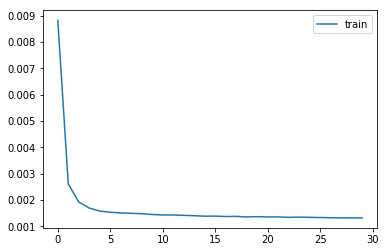

In [47]:
# plot history
plt.plot(fitpr25.history['loss'], label='train')
plt.legend()
plt.show()

## Predictions 

In [66]:
X_test_values = X_test.values
y_test_values = y_test.values

# normalize training features
X_test_scaled = scaler1.fit_transform(X_test_values)

# reshape input to be 3D [samples, timesteps, features]
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

#test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(X_test_scaled.shape, y_test_values.shape)

(18728, 1, 24) (18728,)


In [61]:
ypred   = model.predict(X_test_scaled)

In [67]:
# invert scaling for forecast
inv_ypred =scaler2.inverse_transform(ypred)
inv_ypred = inv_ypred[:,0]



# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_values, inv_ypred))
print('RMSE: %.6f' % rmse)

RMSE: 0.011938


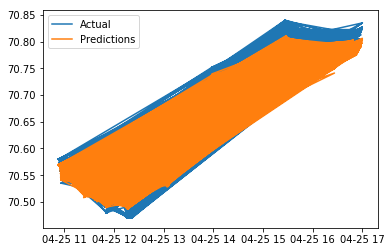

In [73]:
plt.plot(y_test.index,y_test_values, label='Actual')
plt.plot(y_test.index,inv_ypred, label='Predictions')
plt.legend()